In [2]:
pip install jovian --upgrade --quiet

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import torch.nn.functional as F
import seaborn as sns
import numpy as np
import jovian
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

<IPython.core.display.Javascript object>

In [5]:
df=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df["quality"].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [8]:
input_col=df.columns[df.columns!="quality"]
output_col=["quality"]
input_col,output_col

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'),
 ['quality'])

In [9]:
input_array=df[input_col].to_numpy()
output_array=df[output_col].to_numpy()
input_array[:5],output_array[:5]

(array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
         3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
        [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
         6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
        [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
         5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
        [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
         6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
        [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
         3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]]),
 array([[5],
        [5],
        [5],
        [6],
        [5]]))

In [10]:
inputs = torch.from_numpy(input_array).type(torch.float32)
targets = torch.from_numpy(output_array).type(torch.float32)
dataset = TensorDataset(inputs,targets)
dataset[:5]

(tensor([[7.4000e+00, 7.0000e-01, 0.0000e+00, 1.9000e+00, 7.6000e-02, 1.1000e+01,
          3.4000e+01, 9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00],
         [7.8000e+00, 8.8000e-01, 0.0000e+00, 2.6000e+00, 9.8000e-02, 2.5000e+01,
          6.7000e+01, 9.9680e-01, 3.2000e+00, 6.8000e-01, 9.8000e+00],
         [7.8000e+00, 7.6000e-01, 4.0000e-02, 2.3000e+00, 9.2000e-02, 1.5000e+01,
          5.4000e+01, 9.9700e-01, 3.2600e+00, 6.5000e-01, 9.8000e+00],
         [1.1200e+01, 2.8000e-01, 5.6000e-01, 1.9000e+00, 7.5000e-02, 1.7000e+01,
          6.0000e+01, 9.9800e-01, 3.1600e+00, 5.8000e-01, 9.8000e+00],
         [7.4000e+00, 7.0000e-01, 0.0000e+00, 1.9000e+00, 7.6000e-02, 1.1000e+01,
          3.4000e+01, 9.9780e-01, 3.5100e+00, 5.6000e-01, 9.4000e+00]]),
 tensor([[5.],
         [5.],
         [5.],
         [6.],
         [5.]]))

In [11]:
from torch.utils.data import random_split
val_percent = 0.1 # between 0.1 and 0.2
val_size = int(df.shape[0] * val_percent)
train_size = df.shape[0] - val_size


train_ds, val_ds = random_split(dataset,[train_size,val_size]) # Use the random_split function to split dataset into 2 parts of the desired length
len(dataset),len(train_ds),len(val_ds)

(1599, 1440, 159)

In [12]:
batch=20
train_loader=DataLoader(train_ds,batch,shuffle=True)
val_loader=DataLoader(val_ds,batch)

In [13]:
for x,y in train_loader:
    print("X.shape:",x.shape)
    print(x,y)
    break

X.shape: torch.Size([20, 11])
tensor([[6.4000e+00, 6.4000e-01, 2.1000e-01, 1.8000e+00, 8.1000e-02, 1.4000e+01,
         3.1000e+01, 9.9689e-01, 3.5900e+00, 6.6000e-01, 9.8000e+00],
        [1.1000e+01, 2.6000e-01, 6.8000e-01, 2.5500e+00, 8.5000e-02, 1.0000e+01,
         2.5000e+01, 9.9700e-01, 3.1800e+00, 6.1000e-01, 1.1800e+01],
        [7.2000e+00, 6.2000e-01, 6.0000e-02, 2.5000e+00, 7.8000e-02, 1.7000e+01,
         8.4000e+01, 9.9746e-01, 3.5100e+00, 5.3000e-01, 9.7000e+00],
        [8.8000e+00, 4.2000e-01, 2.1000e-01, 2.5000e+00, 9.2000e-02, 3.3000e+01,
         8.8000e+01, 9.9823e-01, 3.1900e+00, 5.2000e-01, 9.2000e+00],
        [6.2000e+00, 7.0000e-01, 1.5000e-01, 5.1000e+00, 7.6000e-02, 1.3000e+01,
         2.7000e+01, 9.9622e-01, 3.5400e+00, 6.0000e-01, 1.1900e+01],
        [7.6000e+00, 5.1000e-01, 1.5000e-01, 2.8000e+00, 1.1000e-01, 3.3000e+01,
         7.3000e+01, 9.9550e-01, 3.1700e+00, 6.3000e-01, 1.0200e+01],
        [7.8000e+00, 4.3000e-01, 3.2000e-01, 2.8000e+00, 8.0000e

In [14]:
input_size=len(input_col)
output_size=len(output_col)
input_size,output_size

(11, 1)

In [29]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [77]:
class WineQuality(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 512)
        self.linear2 = nn.Linear( 512,384)
        self.linear3 = nn.Linear(384, output_size)
        
        
    def forward(self, xb):
        out = self.linear1(xb)
        out=F.relu(out)
        out = self.linear2(out)
        out=F.relu(out)
        out = self.linear3(out)
        out=F.relu(out)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.mse_loss(out, targets) 
        #loss = F.poisson_nll_loss(out, targets) 
        #loss = F.smooth_l1_loss(out, targets) 
        #loss = F.nll_loss(out, targets) 
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.mse_loss(out, targets)
        #loss = F.poisson_nll_loss(out, targets) 
        #loss = F.smooth_l1_loss(out, targets) 
        #loss = F.nll_loss(out, targets)
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 10 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))

In [78]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(x) for x in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [79]:
model=WineQuality()

In [80]:
history = [evaluate(model,val_loader)] # Use the the evaluate function
print(result)

{'val_loss': 0.22999659180641174}


In [81]:
lr=1e-4
history+=fit(150,lr,model,train_loader,val_loader)

Epoch [9], val_loss: 0.7081
Epoch [19], val_loss: 0.5487
Epoch [29], val_loss: 0.5240
Epoch [39], val_loss: 0.5150
Epoch [49], val_loss: 0.7704
Epoch [59], val_loss: 0.5347
Epoch [69], val_loss: 0.5124
Epoch [79], val_loss: 0.5466
Epoch [89], val_loss: 0.5450
Epoch [99], val_loss: 0.5863
Epoch [109], val_loss: 0.5092
Epoch [119], val_loss: 0.6016
Epoch [129], val_loss: 0.6166
Epoch [139], val_loss: 0.5189
Epoch [149], val_loss: 0.5124


In [82]:
lr=1e-4
history+=fit(1000,lr,model,train_loader,val_loader)

Epoch [9], val_loss: 0.5091
Epoch [19], val_loss: 0.5479
Epoch [29], val_loss: 0.5388
Epoch [39], val_loss: 0.5094
Epoch [49], val_loss: 0.5448
Epoch [59], val_loss: 0.5322
Epoch [69], val_loss: 0.5379
Epoch [79], val_loss: 0.5126
Epoch [89], val_loss: 0.5022
Epoch [99], val_loss: 0.5067
Epoch [109], val_loss: 0.5013
Epoch [119], val_loss: 0.5201
Epoch [129], val_loss: 0.5026
Epoch [139], val_loss: 0.5086
Epoch [149], val_loss: 0.5174
Epoch [159], val_loss: 0.6055
Epoch [169], val_loss: 0.5044
Epoch [179], val_loss: 0.5463
Epoch [189], val_loss: 0.5057
Epoch [199], val_loss: 0.5020
Epoch [209], val_loss: 0.5032
Epoch [219], val_loss: 0.5006
Epoch [229], val_loss: 0.5033
Epoch [239], val_loss: 0.5000
Epoch [249], val_loss: 0.5128
Epoch [259], val_loss: 0.5060
Epoch [269], val_loss: 0.5614
Epoch [279], val_loss: 0.4970
Epoch [289], val_loss: 0.5004
Epoch [299], val_loss: 0.5067
Epoch [309], val_loss: 0.5587
Epoch [319], val_loss: 0.4999
Epoch [329], val_loss: 0.5556
Epoch [339], val_loss

In [83]:
lr=1e-5
history+=fit(300,lr,model,train_loader,val_loader)

Epoch [9], val_loss: 0.4674
Epoch [19], val_loss: 0.4676
Epoch [29], val_loss: 0.4699
Epoch [39], val_loss: 0.4671
Epoch [49], val_loss: 0.4708
Epoch [59], val_loss: 0.4669
Epoch [69], val_loss: 0.4675
Epoch [79], val_loss: 0.4675
Epoch [89], val_loss: 0.4693
Epoch [99], val_loss: 0.4671
Epoch [109], val_loss: 0.4668
Epoch [119], val_loss: 0.4664
Epoch [129], val_loss: 0.4698
Epoch [139], val_loss: 0.4675
Epoch [149], val_loss: 0.4683
Epoch [159], val_loss: 0.4714
Epoch [169], val_loss: 0.4687
Epoch [179], val_loss: 0.4671
Epoch [189], val_loss: 0.4661
Epoch [199], val_loss: 0.4675
Epoch [209], val_loss: 0.4675
Epoch [219], val_loss: 0.4662
Epoch [229], val_loss: 0.4668
Epoch [239], val_loss: 0.4708
Epoch [249], val_loss: 0.4669
Epoch [259], val_loss: 0.4673
Epoch [269], val_loss: 0.4663
Epoch [279], val_loss: 0.4661
Epoch [289], val_loss: 0.4672
Epoch [299], val_loss: 0.4670


In [84]:
lr=1e-6
history+=fit(440,lr,model,train_loader,val_loader)

Epoch [9], val_loss: 0.4660
Epoch [19], val_loss: 0.4660
Epoch [29], val_loss: 0.4660
Epoch [39], val_loss: 0.4661
Epoch [49], val_loss: 0.4662
Epoch [59], val_loss: 0.4662
Epoch [69], val_loss: 0.4663
Epoch [79], val_loss: 0.4661
Epoch [89], val_loss: 0.4664
Epoch [99], val_loss: 0.4664
Epoch [109], val_loss: 0.4664
Epoch [119], val_loss: 0.4663
Epoch [129], val_loss: 0.4663
Epoch [139], val_loss: 0.4662
Epoch [149], val_loss: 0.4662
Epoch [159], val_loss: 0.4661
Epoch [169], val_loss: 0.4660
Epoch [179], val_loss: 0.4661
Epoch [189], val_loss: 0.4662
Epoch [199], val_loss: 0.4662
Epoch [209], val_loss: 0.4662
Epoch [219], val_loss: 0.4661
Epoch [229], val_loss: 0.4660
Epoch [239], val_loss: 0.4662
Epoch [249], val_loss: 0.4660
Epoch [259], val_loss: 0.4661
Epoch [269], val_loss: 0.4662
Epoch [279], val_loss: 0.4661
Epoch [289], val_loss: 0.4662
Epoch [299], val_loss: 0.4661
Epoch [309], val_loss: 0.4660
Epoch [319], val_loss: 0.4662
Epoch [329], val_loss: 0.4661
Epoch [339], val_loss

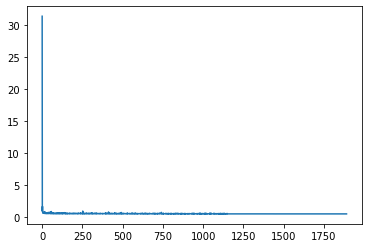

In [85]:
#history=history1+history2+history3+history4
val_loss=[x['val_loss'] for x in history]
plt.plot(val_loss)

In [86]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)     #Unsqueeze so that single data can be evaluated 
    predictions = model(inputs)                
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [95]:
input, target = val_ds[81]
predict_single(input, target, model)

Input: tensor([ 7.1000,  0.6700,  0.0000,  2.3000,  0.0830, 18.0000, 27.0000,  0.9977,
         3.4400,  0.5400,  9.4000])
Target: tensor([5.])
Prediction: tensor([5.2274])


In [96]:
result=evaluate(model,val_loader)
result

{'val_loss': 0.4659877419471741}

In [ ]:
project_name="red-wine-quality"
jovian.commit(project=project_name, environment=None)


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/nakatanand2000/red-wine-quality


<IPython.core.display.Javascript object>

In [97]:
jovian.log_metrics(val_loss=history[-1]['val_loss'])

[jovian] Metrics logged.


In [201]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/nakatanand2000/red-wine-quality


<IPython.core.display.Javascript object>